# Project 1

Cifar 100 classification Dataset Link: this Dataset is available in tensorflow datasets

In [85]:
from keras.datasets import cifar100

In [86]:
(X_train_full,y_train_full), (x_test_full,y_test_full) =  cifar100.load_data()

169001437/169001437 [==============================] - 2s 0us/step


In [87]:
print(X_train_full.shape, x_test_full.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [88]:
print(y_train_full.shape,y_test_full.shape)

(50000, 1) (10000, 1)


In [89]:
train_examples = 20000  # dataset is too big that'sy we taking less data 

In [90]:
x_train= X_train_full[:train_examples]

In [91]:
y_train = y_train_full[:train_examples]

In [92]:
print(x_train.shape , y_train.shape)

(20000, 32, 32, 3) (20000, 1)


In [93]:
test_examples = 2000

In [94]:
x_test = x_test_full[:test_examples]

In [95]:
y_test = y_test_full[:test_examples]

In [96]:
print(x_test.shape, y_test.shape)

(2000, 32, 32, 3) (2000, 1)


In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
def show_samples(data, labels):
    plt.subplots(figsize=(10, 10))
    for i in range(12):
        plt.subplot(3, 4, i+1)
        k = np.random.randint(0, data.shape[0])
        plt.imshow(data[k])
    plt.tight_layout()
    plt.show()

<ipython-input-98-acac8d87e5bc>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 4, i+1)


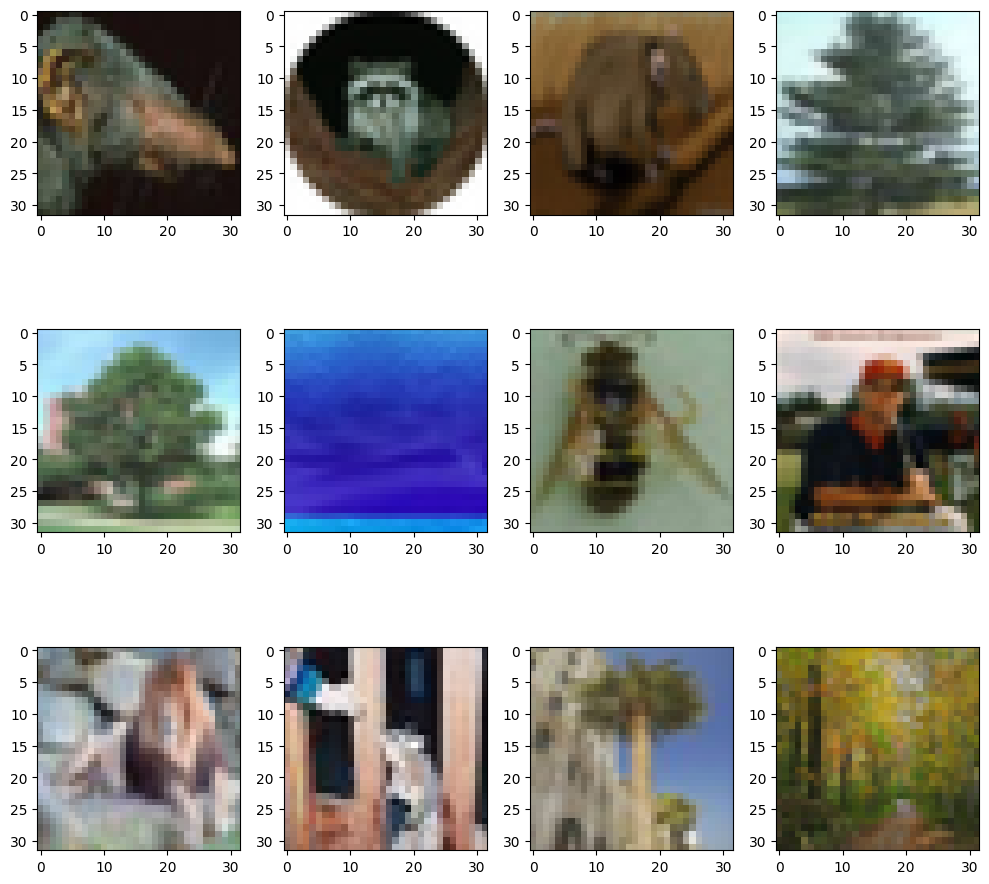

In [99]:
show_samples(x_train, y_train)

In [100]:
from tensorflow.keras.preprocessing.image import img_to_array,array_to_img
from PIL import Image
import numpy as np
def resize_images(images): #inception model accepts data as (75 * 75) but our data is (32 * 32) therefore we are resizing the data
  resized_images = []
  for image in images:
    image = img_to_array(image)
    image = Image.fromarray(image.astype('uint8'))
    image = image.resize((75, 75))
    image = img_to_array(image)
    resized_images.append(image)
  return np.array(resized_images)

In [101]:
x_train = resize_images(x_train)

In [102]:
x_test = resize_images(x_test)

In [103]:
print(x_train.shape, x_test.shape)

(20000, 75, 75, 3) (2000, 75, 75, 3)


In [104]:
# normalize the image 
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [105]:
y_train.shape

(20000, 1)

In [106]:
y_train[1]

array([29])

In [107]:
y_train_labels = set(y_train.ravel())

In [108]:
y_train_labels 

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99}

In [109]:
y_test_labels = set(y_test.ravel())

In [110]:
y_test_labels


{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99}

In [111]:
len(y_test_labels)

100

In [112]:
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(y_test,num_classes =100)
y_train = to_categorical(y_train,num_classes =100)

In [113]:
y_test.shape

(2000, 100)

In [114]:
y_train.shape

(20000, 100)

importing pretrained model

In [115]:
from keras.applications.vgg16 import VGG16

In [116]:
base_model = VGG16(weights = 'imagenet',include_top=False, input_shape=(75,75,3))

58889256/58889256 [==============================] - 0s 0us/step


In [117]:
for layer in base_model.layers:
  layer.trainable = False #i am freezing the base layers 

In [118]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [119]:
model = Sequential()
model.add(base_model)
model.add(Flatten())

In [120]:

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(100, activation = 'softmax'))

In [121]:
from tensorflow.keras.optimizers import Adam
adam = Adam(lr = 0.0001)

In [122]:
from keras.backend import categorical_crossentropy
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [123]:
batch_size = 60
epochs = 20

In [124]:
history = model.fit(x_train,y_train,batch_size = batch_size, epochs = epochs, validation_data = (x_test,y_test) )

Epoch 1/20
334/334 [==============================] - 28s 55ms/step - loss: 4.0265 - accuracy: 0.0899 - val_loss: 3.2924 - val_accuracy: 0.2125
Epoch 2/20
334/334 [==============================] - 16s 49ms/step - loss: 3.1891 - accuracy: 0.2078 - val_loss: 2.8359 - val_accuracy: 0.2815
Epoch 3/20
334/334 [==============================] - 16s 48ms/step - loss: 2.8747 - accuracy: 0.2679 - val_loss: 2.6829 - val_accuracy: 0.3205
Epoch 4/20
334/334 [==============================] - 16s 48ms/step - loss: 2.6881 - accuracy: 0.3047 - val_loss: 2.5350 - val_accuracy: 0.3450
Epoch 5/20
334/334 [==============================] - 16s 48ms/step - loss: 2.5570 - accuracy: 0.3307 - val_loss: 2.5025 - val_accuracy: 0.3565
Epoch 6/20
334/334 [==============================] - 15s 46ms/step - loss: 2.4530 - accuracy: 0.3525 - val_loss: 2.4333 - val_accuracy: 0.3700
Epoch 7/20
334/334 [==============================] - 15s 45ms/step - loss: 2.3567 - accuracy: 0.3683 - val_loss: 2.4248 - val_accuracy:

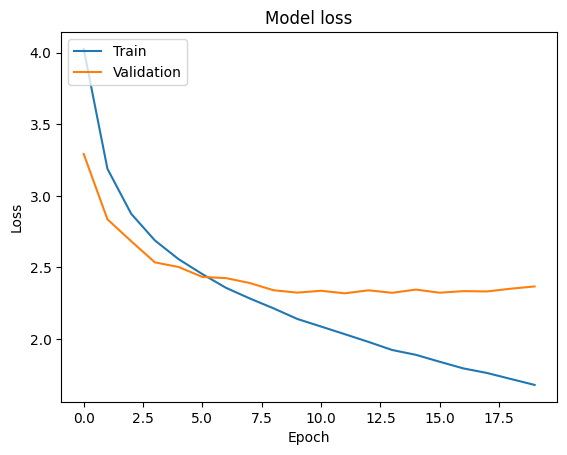

In [125]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

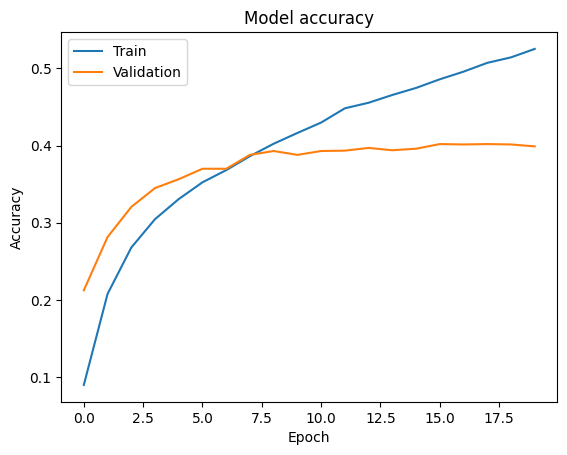

In [126]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [183]:
# Get list of label names
class_names  = [
    'beaver', 'dolphin', 'otter', 'seal', 'whale', 'aquarium fish', 'flatfish', 'ray', 'shark', 'trout', 
    'orchids', 'poppies', 'roses', 'sunflowers', 'tulips', 'bottles', 'bowls', 'cans', 'cups', 'plates',
    'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers', 'clock', 'computer keyboard', 'lamp', 'telephone', 'television',
    'bed', 'chair', 'couch', 'table', 'wardrobe', 'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach',
    'bear', 'leopard', 'lion', 'tiger', 'wolf', 'bridge', 'castle', 'house', 'road', 'skyscraper',
    'cloud', 'forest', 'mountain', 'plain', 'sea', 'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo',
    'fox', 'porcupine', 'possum', 'raccoon', 'skunk', 'crab', 'lobster', 'snail', 'spider', 'worm',
    'baby', 'boy', 'girl', 'man', 'woman', 'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle',
    'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel', 'maple', 'oak', 'palm', 'pine', 'willow',
    'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train', 'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor'
]



In [320]:
# get the random image from dataset 
index = np.random.randint(len(x_train))
image = X_train_full[index]
label = y_train_full[index][0]

In [321]:
image # that image 

array([[[ 61,  57,  62],
        [ 60,  54,  56],
        [ 66,  56,  58],
        ...,
        [ 55,  51,  53],
        [ 59,  54,  59],
        [ 60,  57,  62]],

       [[ 61,  58,  62],
        [ 61,  54,  56],
        [ 66,  56,  58],
        ...,
        [ 53,  48,  51],
        [ 56,  51,  57],
        [ 56,  54,  59]],

       [[ 60,  56,  60],
        [ 60,  53,  56],
        [ 66,  57,  58],
        ...,
        [ 53,  49,  51],
        [ 57,  52,  57],
        [ 57,  54,  60]],

       ...,

       [[ 78,  81,  81],
        [ 84,  87,  87],
        [ 95,  98,  97],
        ...,
        [225, 225, 233],
        [221, 221, 228],
        [216, 216, 223]],

       [[121, 131, 135],
        [131, 141, 145],
        [140, 150, 153],
        ...,
        [201, 197, 204],
        [215, 212, 218],
        [224, 222, 228]],

       [[166, 180, 187],
        [177, 190, 197],
        [184, 196, 203],
        ...,
        [244, 238, 244],
        [250, 244, 250],
        [251, 247, 252]]

In [322]:
label # the image having label 

66

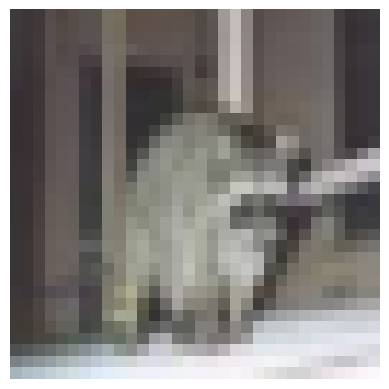

In [323]:
plt.imshow(image)
plt.axis('off')
plt.show()

In [324]:
from tensorflow.keras.preprocessing.image import img_to_array,array_to_img
from PIL import Image
import numpy as np
def resize_single_images(image): #inception model accepts data as (75 * 75) but our data is (32 * 32) therefore we are resizing the data
  image = img_to_array(image)
  image = Image.fromarray(image.astype('uint8'))
  image = image.resize((75, 75))
  image = img_to_array(image)
  return np.array(image)

In [325]:
image = resize_single_images(image)


In [326]:
image = image.astype('float32') / 255


In [327]:
image.shape

(75, 75, 3)

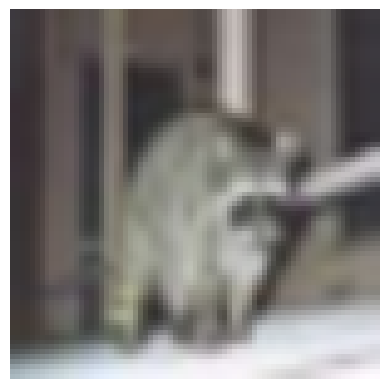

In [328]:
plt.imshow(image)
plt.axis('off')
plt.show()

In [329]:
image.shape

(75, 75, 3)

In [330]:
image = image.reshape((1,75,75,3))

In [331]:
image.shape

(1, 75, 75, 3)

In [332]:
label = model.predict(image)

1/1 [==============================] - 0s 22ms/step


In [333]:
label

array([[6.9693638e-06, 8.1864739e-05, 9.3351747e-04, 9.4833812e-03,
        5.2663418e-03, 8.2986522e-04, 1.6370490e-03, 7.7962643e-05,
        1.6744470e-02, 1.1087100e-03, 4.7056827e-05, 2.1188546e-03,
        3.5282728e-04, 3.6143677e-04, 3.7493941e-05, 2.9086084e-03,
        2.6234469e-04, 9.1006292e-04, 2.6644655e-03, 1.2122228e-02,
        1.7484982e-06, 4.5953720e-04, 3.1944748e-04, 7.4439566e-04,
        7.0909127e-06, 8.1325945e-04, 2.1555500e-04, 1.6736344e-03,
        2.1324292e-04, 2.2319693e-03, 1.2712148e-05, 5.3991124e-02,
        2.9153873e-03, 1.2930411e-01, 5.7599440e-02, 1.4054130e-03,
        3.2752666e-03, 8.7711116e-04, 9.9928394e-02, 1.3141581e-04,
        1.6896002e-04, 9.6710501e-05, 1.7226428e-01, 7.1851243e-03,
        7.5552019e-04, 2.5822322e-03, 1.0977825e-03, 3.6970462e-04,
        2.1691386e-04, 9.8931159e-06, 7.1078064e-03, 1.9132664e-03,
        5.1743460e-05, 9.8729834e-06, 4.3033020e-04, 1.8765832e-03,
        1.4600880e-04, 4.9698028e-05, 3.5766359e

In [334]:
label_index = np.argmax(label)

In [335]:
label_index

42

In [336]:
class_names[label_index]

'lion'

# Project 2 

Sentiment analysis on 1.6 million tweets. Context
This is the sentiment140 dataset
. It contains 1,600,000 tweets extracted using the
twitter api .

 The tweets have been annotated (0 = negative, 4 = positive) and they
can be used to detect sentiment . Content

It contains the following 6 fields:
target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

ids: The id of the tweet ( 2087)
date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
flag: The query (lyx). If there is no query, then this value is NO_QUERY. user: the user that tweeted (robotickilldozr)

text: the text of the tweet (Lyx is cool)
Dataset link : https://www.kaggle.com/kazanova/sentiment140


In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install torch #no change

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import torch #no change
from tqdm.notebook import tqdm #no changeimport numpy as np #no change
import pandas as pd #no change

In [4]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
#{"username":"jayrajs","key":"9a3df5719d0bd66854abb4434a86c460"}
import opendatasets as od
od.download(
    "https://www.kaggle.com/datasets/kazanova/sentiment140/code")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jayrajs
Your Kaggle Key: ··········


100%|██████████| 80.9M/80.9M [00:00<00:00, 107MB/s] 


In [6]:
import pandas as pd

# Read the Sentiment140 dataset CSV file into a pandas dataframe
df = pd.read_csv('/content/sentiment140/training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None, names=['polarity', 'id', 'date', 'query', 'user', 'text'])


In [7]:
df

,polarity,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [8]:
df.columns

Index(['polarity', 'id', 'date', 'query', 'user', 'text'], dtype='object')

In [9]:
df.drop(['id', 'date', 'query', 'user'], axis=1, inplace=True)


In [10]:
df = df[['text', 'polarity']]

In [11]:
df

,text,polarity
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
...,...,...
1599995,Just woke up. Having no school is the best fee...,4
1599996,TheWDB.com - Very cool to hear old Walt interv...,4
1599997,Are you ready for your MoJo Makeover? Ask me f...,4
1599998,Happy 38th Birthday to my boo of alll time!!! ...,4


In [12]:
df = df.sample(n=50000, random_state=42)


In [13]:
df

,text,polarity
541200,@chrishasboobs AHHH I HOPE YOUR OK!!!,0
750,"@misstoriblack cool , i have no tweet apps fo...",0
766711,@TiannaChaos i know just family drama. its la...,0
285055,School email won't open and I have geography ...,0
705995,upper airways problem,0
...,...,...
199266,On the way home. Tired. I don't wanna babysit,0
210814,Well that was ten sneezes in a row. My allergi...,0
180674,can't go out tonight car is acting funny wat...,0
364859,Headacheeeee,0


In [14]:
set(df.polarity)

{0, 4}

In [15]:
df.polarity.value_counts() #change 

4    25014
0    24986
Name: polarity, dtype: int64

In [16]:
possible_labels = df.polarity.unique()

In [17]:
possible_labels

array([0, 4])

In [18]:
label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index

In [19]:
label_dict

{0: 0, 4: 1}

In [20]:
df.polarity.unique()

array([0, 4])

In [21]:
df.polarity = df['polarity'].map(label_dict)

In [22]:
df.polarity.unique()

array([0, 1])

In [23]:
df.head(10)

,text,polarity
541200,@chrishasboobs AHHH I HOPE YOUR OK!!!,0
750,"@misstoriblack cool , i have no tweet apps fo...",0
766711,@TiannaChaos i know just family drama. its la...,0
285055,School email won't open and I have geography ...,0
705995,upper airways problem,0
379611,Going to miss Pastor's sermon on Faith...,0
1189018,on lunch....dj should come eat with me,1
667030,@piginthepoke oh why are you feeling like that?,0
93541,gahh noo!peyton needs to live!this is horrible,0
1097326,@mrstessyman thank you glad you like it! There...,1


In [24]:
import re

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove urls
    text = re.sub(r'http\S+', '', text)
    
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text


In [25]:
df['text'] = df['text'].apply(clean_text)  # we clean all the text here 


In [26]:
df

,text,polarity
541200,ahhh i hope your ok,0
750,cool i have no tweet apps for my razr,0
766711,i know just family drama its lamehey next time...,0
285055,school email wont open and i have geography st...,0
705995,upper airways problem,0
...,...,...
199266,on the way home tired i dont wanna babysit,0
210814,well that was ten sneezes in a row my allergie...,0
180674,cant go out tonight car is acting funny wat sh...,0
364859,headacheeeee,0


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df.index.values, 
                                                   
                                                  df.polarity.values,
                                                  test_size=0.15, 
                                                  random_state=42,
                                                  stratify=df.polarity.values)
                                                  #stratify=df.category.values)

In [28]:
df.head()

,text,polarity
541200,ahhh i hope your ok,0
750,cool i have no tweet apps for my razr,0
766711,i know just family drama its lamehey next time...,0
285055,school email wont open and i have geography st...,0
705995,upper airways problem,0


In [29]:
df['data_type'] = ['not_set']*df.shape[0]

In [30]:
df

,text,polarity,data_type
541200,ahhh i hope your ok,0,not_set
750,cool i have no tweet apps for my razr,0,not_set
766711,i know just family drama its lamehey next time...,0,not_set
285055,school email wont open and i have geography st...,0,not_set
705995,upper airways problem,0,not_set
...,...,...,...
199266,on the way home tired i dont wanna babysit,0,not_set
210814,well that was ten sneezes in a row my allergie...,0,not_set
180674,cant go out tonight car is acting funny wat sh...,0,not_set
364859,headacheeeee,0,not_set


In [31]:
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'

In [32]:
df

,text,polarity,data_type
541200,ahhh i hope your ok,0,train
750,cool i have no tweet apps for my razr,0,train
766711,i know just family drama its lamehey next time...,0,train
285055,school email wont open and i have geography st...,0,train
705995,upper airways problem,0,train
...,...,...,...
199266,on the way home tired i dont wanna babysit,0,train
210814,well that was ten sneezes in a row my allergie...,0,val
180674,cant go out tonight car is acting funny wat sh...,0,train
364859,headacheeeee,0,val


In [33]:

df.groupby(['polarity', 'data_type']).count()

text
polarity data_type       
0        train      21238
         val         3748
1        train      21262
         val         3752

In [34]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 99.8 MB/s eta 0:00:00


In [35]:
from transformers import BertTokenizer
from torch.utils.data import TensorDataset

In [36]:
tokenizer = BertTokenizer.from_pretrained(
    'bert-base-uncased', #bert-base-uncased using small bert model for simple data , bert-large-uncased fo large data
    do_lower_case=True
)

In [37]:
encoded_data_train = tokenizer.batch_encode_plus(
    
    df[df.data_type=='train'].text.values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=256,
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    df[df.data_type=='val'].text.values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=256,
    return_tensors='pt'
)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [38]:


input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type=='train'].polarity.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df[df.data_type=='val'].polarity.values)

In [39]:
input_ids_train

tensor([[  101,  6289, 23644,  ...,     0,     0,     0],
        [  101,  4658,  1045,  ...,     0,     0,     0],
        [  101,  1045,  2113,  ...,     0,     0,     0],
        ...,
        [  101,  2006,  1996,  ...,     0,     0,     0],
        [  101,  2064,  2102,  ...,     0,     0,     0],
        [  101,  2017,  1998,  ...,     0,     0,     0]])

In [40]:
input_ids_val

tensor([[  101,  2000,  7680,  ...,     0,     0,     0],
        [  101,  3398,  8785,  ...,     0,     0,     0],
        [  101,  2074,  2978,  ...,     0,     0,     0],
        ...,
        [  101,  5292,  2197,  ...,     0,     0,     0],
        [  101,  2092,  2008,  ...,     0,     0,     0],
        [  101, 14978,  4402,  ...,     0,     0,     0]])

In [41]:
#TensorDataset create a single variable which stores info of inputids , attentionmsk, labels
dataset_train = TensorDataset(input_ids_train, 
                              attention_masks_train,
                              labels_train)

dataset_val = TensorDataset(input_ids_val, 
                            attention_masks_val,
                           labels_val)

In [42]:
dataset_train

In [43]:
dataset_val

In [44]:
from transformers import BertForSequenceClassification

In [45]:
model = BertForSequenceClassification.from_pretrained(
                                      'bert-base-uncased', 
                                      num_labels = len(label_dict),#2
                                      output_attentions = False,
                                      output_hidden_states = False
                                     )

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [46]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

In [47]:
batch_size = 32

dataloader_train = DataLoader(
    dataset_train,
    sampler=RandomSampler(dataset_train),
    batch_size=batch_size
)

dataloader_val = DataLoader(
    dataset_val,
    sampler=RandomSampler(dataset_val),
    batch_size=32
)

In [48]:
from transformers import AdamW, get_linear_schedule_with_warmup

In [49]:
optimizer = AdamW(
    model.parameters(),
    lr = 1e-5,
    eps = 1e-8
)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [50]:
epochs = 1

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps = len(dataloader_train)*epochs
)

In [51]:
import numpy as np
from sklearn.metrics import f1_score

In [52]:
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average = 'weighted')

In [53]:
def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    
    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy:{len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [54]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [55]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(device)

cuda


In [56]:
def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in tqdm(dataloader_val):
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

In [57]:
for epoch in tqdm(range(1, epochs+1)):
    model.train() #forward propagation
    loss_train_total = 0
    
    progress_bar = tqdm(dataloader_train, 
                        desc='Epoch {:1d}'.format(epoch), 
                        leave=False, 
                        disable=False)
    
    for batch in progress_bar:
        model.zero_grad()
        batch = tuple(b.to(device) for b in batch)
        inputs = {
            'input_ids': batch[0],
            'attention_mask': batch[1],
            'labels': batch[2]
        }
        
        outputs = model(**inputs)
        loss = outputs[0]
        loss_train_total +=loss.item()
        loss.backward() #backwardprop
        
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        
        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})     
    
    torch.save(model, f'BERT_ft_Epoch{epoch}.model')
    
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_val)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (weighted): {val_f1}')

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/1329 [00:00<?, ?it/s]


Epoch 1
Training loss: 0.44839313887536214


  0%|          | 0/235 [00:00<?, ?it/s]

Validation loss: 0.4014954351364298
F1 Score (weighted): 0.8209333428835571


## EVALUATION

In [62]:
import torch

In [63]:
headline = '''No one is born hating another person because of the color of his skin 
              or his background or his religion...@BarackObama'''

In [64]:
import re

def clean_text(headline):
    text = headline.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip() 
    return text


In [65]:

headline = clean_text(headline)

print(headline)

no one is born hating another person because of the color of his skin or his background or his religion


In [66]:
headline

'no one is born hating another person because of the color of his skin or his background or his religion'

In [67]:
from transformers import BertTokenizer

In [68]:
tokenizer = BertTokenizer.from_pretrained(
    'bert-base-uncased', #bert-base-uncased using small bert model for simple data , bert-large-uncased fo large data
    do_lower_case=True
)

In [69]:
device = torch.device('cpu')

In [70]:
print(device)

cpu


In [71]:
encoded_headline = tokenizer(headline, return_tensors = 'pt')

In [72]:
encoded_headline

{'input_ids': tensor([[  101,  2053,  2028,  2003,  2141, 22650,  2178,  2711,  2138,  1997,
          1996,  3609,  1997,  2010,  3096,  2030,  2010,  4281,  2030,  2010,
          4676,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [73]:
input_ids = encoded_headline['input_ids'].to(device)
attention_msk = encoded_headline['attention_mask'].to(device)

In [74]:
path ='/content/BERT_ft_Epoch1.model'

In [75]:

model = torch.load(path, map_location = torch.device('cpu'))

In [76]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [77]:
model_output = model(input_ids,attention_msk)

In [78]:
model_output

SequenceClassifierOutput(loss=None, logits=tensor([[ 0.2670, -0.0531]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [79]:
model_output_tensor = torch.tensor(model_output.logits)

<ipython-input-79-d2b33ccd89fe>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  model_output_tensor = torch.tensor(model_output.logits)


In [80]:
model_output_tensor

tensor([[ 0.2670, -0.0531]])

In [81]:
model_output_tensor_categoryIndex = int(torch.argmax(model_output_tensor))

In [82]:
model_output_tensor_categoryIndex

0

In [83]:
classes = {0: 'Negative', 1: 'positive'}  

In [84]:
classes[model_output_tensor_categoryIndex]

'Negative'